In [1]:
!pip install indic-nlp-library
!pip install inltk

     |████████████████████████████████| 1.3MB 4.1MB/s 
     |████████████████████████████████| 81kB 6.7MB/s 
     |████████████████████████████████| 235kB 14.4MB/s 
     |████████████████████████████████| 1.2MB 12.4MB/s 
     |████████████████████████████████| 296kB 26.0MB/s 
     |████████████████████████████████| 143kB 25.1MB/s 
  Created wheel for typing: filename=typing-3.7.4.3-cp36-none-any.whl size=26310 sha256=93a8c8a222fdc30e68ced47024f86f12f918c5400ba82c5d2c62f68845d56aed
  Stored in directory: /root/.cache/pip/wheels/2d/04/41/8e1836e79581989c22eebac3f4e70aaac9af07b0908da173be
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3163 sha256=f5277b58e83d04fc2229c205df58639187870b5dc03bcf84d66cd2ad4f87a27a
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built typing idna-ssl
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fas

In [2]:
 import matplotlib.pyplot as plt
 from sklearn.cluster import KMeans
 from sklearn.metrics import silhouette_score
 from sklearn.preprocessing import StandardScaler
 from sklearn.utils import shuffle


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [3]:
!wget 'https://raw.githubusercontent.com/gadepall/dharma/main/mantra/aigiri.txt'#21 items 
!wget 'https://raw.githubusercontent.com/xangelina007/Datasets/main/hanuman_chalisa_hindi.txt'#40 items 
stothram_file = open('aigiri.txt','r')
stothram_txt = stothram_file.read()
stothram_file.close()

chalisa_file = open('hanuman_chalisa_hindi.txt', 'r')
chalisa_txt = chalisa_file.read()
chalisa_file.close()


--2021-01-31 04:05:20--  https://raw.githubusercontent.com/gadepall/dharma/main/mantra/aigiri.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11269 (11K) [text/plain]
Saving to: ‘aigiri.txt’

aigiri.txt          100%[===================>]  11.00K  --.-KB/s    in 0s      

2021-01-31 04:05:20 (76.2 MB/s) - ‘aigiri.txt’ saved [11269/11269]

--2021-01-31 04:05:20--  http://items/
Resolving items (items)... failed: Name or service not known.
wget: unable to resolve host address ‘items’
FINISHED --2021-01-31 04:05:20--
Total wall clock time: 0.3s
Downloaded: 1 files, 11K in 0s (76.2 MB/s)
--2021-01-31 04:05:20--  https://raw.githubusercontent.com/xangelina007/Datasets/main/hanuman_chalisa_hindi.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)...

In [4]:


def get_sloka_from_stothram(stothram_txt):
  slokams = []
  for sloka in stothram_txt.split('॥'):
    if not sloka.replace(' ', '').isnumeric() and not sloka == '\n' and not sloka == '':
      slokams.append( sloka.replace('|', '').replace('\n', '') )
  return slokams

def gen_patterns(slokams,P_list):
  #global pattern_list
  for sloka in slokams:
    temp = {}
    for words in sloka.split():
      for char in words:
        if char in temp.keys():
          temp[char] = temp[char] + 1
        else:
          temp[char] = 1 
    P_list.append(temp)

def to_find_accuracy(predicted, actual):
  if len(predicted) == len(actual):
    right = 0
    for i in range(len(actual)):
      if predicted[i] == actual[i]:
        right = right + 1
    print('accuracy: ', right/len(actual))

In [5]:
aigiri = get_sloka_from_stothram(stothram_txt)
chalisa = get_sloka_from_stothram(chalisa_txt)
#print(aigiri)

In [6]:
aigri_list=[]
chalisa_list=[]
gen_patterns(aigiri,aigri_list)
gen_patterns(chalisa,chalisa_list)

In [7]:
df = pd.DataFrame(aigri_list).fillna(0)
df

,अ,य,ि,ग,र,न,्,द,त,म,े,व,श,ो,ु,ध,ऽ,ा,स,ष,ण,ल,ज,।,भ,ह,क,ठ,ट,ब,ू,ृ,प,ै,ख,ङ,घ,ञ,ड,च,ी,थ,फ,ः,ं,झ,ौ
0,1.0,5.0,40.0,3.0,10.0,20.0,14.0,7.0,7.0,6.0,7.0,9.0,4.0,2.0,10.0,2.0,1.0,3.0,4.0,3.0,3.0,2.0,3.0,1.0,3.0,3.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,3.0,30.0,0.0,20.0,6.0,14.0,8.0,8.0,7.0,5.0,3.0,3.0,7.0,12.0,3.0,0.0,1.0,6.0,13.0,9.0,2.0,3.0,0.0,1.0,3.0,3.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,8.0,19.0,5.0,11.0,7.0,12.0,5.0,5.0,13.0,6.0,2.0,4.0,1.0,6.0,4.0,0.0,5.0,5.0,1.0,1.0,3.0,6.0,1.0,3.0,4.0,4.0,0.0,2.0,3.0,0.0,1.0,2.0,3.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,4.0,20.0,4.0,9.0,4.0,15.0,5.0,12.0,6.0,5.0,4.0,4.0,0.0,9.0,3.0,0.0,8.0,2.0,1.0,12.0,1.0,6.0,1.0,2.0,2.0,2.0,0.0,1.0,0.0,0.0,1.0,8.0,1.0,3.0,0.0,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,5.0,14.0,0.0,19.0,5.0,11.0,13.0,15.0,8.0,5.0,4.0,5.0,1.0,12.0,4.0,0.0,7.0,2.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,4.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
5,1.0,6.0,16.0,1.0,17.0,5.0,7.0,8.0,7.0,11.0,5.0,7.0,5.0,3.0,9.0,4.0,1.0,7.0,3.0,1.0,1.0,4.0,2.0,1.0,3.0,3.0,7.0,0.0,0.0,0.0,2.0,2.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,4.0,19.0,0.0,11.0,6.0,11.0,3.0,13.0,11.0,5.0,6.0,10.0,4.0,6.0,2.0,0.0,5.0,4.0,2.0,2.0,3.0,5.0,1.0,4.0,5.0,3.0,0.0,0.0,2.0,3.0,2.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,3.0,10.0,9.0,13.0,7.0,20.0,6.0,7.0,3.0,5.0,0.0,3.0,0.0,9.0,1.0,0.0,2.0,5.0,6.0,2.0,2.0,2.0,1.0,1.0,4.0,11.0,0.0,7.0,4.0,0.0,3.0,4.0,1.0,0.0,9.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,7.0,14.0,3.0,10.0,9.0,6.0,7.0,13.0,5.0,7.0,1.0,1.0,2.0,13.0,7.0,0.0,7.0,3.0,1.0,0.0,5.0,2.0,1.0,1.0,3.0,12.0,0.0,2.0,0.0,1.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0,0.0,1.0,2.0,0.0,0.0
9,0.0,10.0,16.0,1.0,9.0,12.0,13.0,3.0,14.0,5.0,6.0,2.0,4.0,1.0,6.0,1.0,0.0,6.0,4.0,1.0,2.0,1.0,8.0,1.0,1.0,3.0,3.0,0.0,6.0,1.0,2.0,1.0,6.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0


In [8]:
df = pd.DataFrame(chalisa_list).fillna(0)
df

,ज,य,ह,न,ु,म,ा,्,ञ,ग,ण,स,र,।,क,प,ी,श,त,ि,ल,ॊ,उ,द,ू,अ,ब,ध,व,ङ,ॆ,च,ड,थ,औ,ै,ऊ,आ,भ,ख,ष,ं,ट,घ,ई,ठ,(,),ऎ,फ,छ,इ,ौ,ृ
0,4.0,2.0,2.0,3.0,3.0,1.0,4,1.0,1.0,3.0,1.0,1.0,2,1,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,3.0,3.0,3.0,5,2.0,1.0,0.0,0.0,1.0,2,1,0.0,2.0,0.0,0.0,5.0,2.0,2.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,1.0,2.0,4.0,2,3.0,0.0,2.0,0.0,2.0,4,1,3.0,0.0,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,3.0,3.0,0.0,4,3.0,2.0,0.0,2.0,1.0,2,1,5.0,0.0,0.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6.0,0.0,1.0,2.0,0.0,1.0,5,4.0,1.0,0.0,0.0,1.0,2,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,2.0,0.0,0.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,0.0,1.0,6.0,1.0,1.0,2,4.0,0.0,1.0,0.0,2.0,3,1,2.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,1.0,0.0,1.0,3.0,1.0,5,1.0,0.0,1.0,1.0,0.0,4,1,3.0,0.0,1.0,0.0,3.0,3.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,2.0,0.0,3.0,2.0,2.0,4,2.0,0.0,0.0,0.0,4.0,5,1,1.0,1.0,1.0,0.0,2.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,1.0,1.0,0.0,0.0,1.0,4,3.0,0.0,0.0,0.0,2.0,5,1,3.0,2.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,1.0,1.0,1.0,2.0,4,2.0,0.0,0.0,0.0,3.0,7,1,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
pattern_list=[]
pattern_list=chalisa_list + aigri_list

df = pd.DataFrame(pattern_list).fillna(0)
df

x = df.values
y = np.concatenate((np.ones(22), np.zeros(40)))

In [10]:
x.shape

(62, 59)

In [11]:
y.shape

(62,)

In [12]:
x, y = shuffle(x, y)

In [13]:

preprocessor = Pipeline(
    [
      ("scaler", MinMaxScaler()),
      ("pca", PCA(n_components=2, random_state=42)),
    ]
   )

In [14]:
clusterer = Pipeline(
   [
       (
           "kmeans",
           KMeans(
               n_clusters = 2,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           ),
       ),
   ]
)

In [15]:
pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", clusterer)
    ]
)

In [16]:
pipe.fit(x)

Pipeline(memory=None,
         steps=[('preprocessor',
                 Pipeline(memory=None,
                          steps=[('scaler',
                                  MinMaxScaler(copy=True,
                                               feature_range=(0, 1))),
                                 ('pca',
                                  PCA(copy=True, iterated_power='auto',
                                      n_components=2, random_state=42,
                                      svd_solver='auto', tol=0.0,
                                      whiten=False))],
                          verbose=False)),
                ('clusterer',
                 Pipeline(memory=None,
                          steps=[('kmeans',
                                  KMeans(algorithm='auto', copy_x=True,
                                         init='k-means++', max_iter=500,
                                         n_clusters=2, n_init=50, n_jobs=None,
                                         precomp

In [17]:
to_find_accuracy(pipe["clusterer"]["kmeans"].labels_, y)

accuracy:  0.3064516129032258


In [18]:
preprocessed_data = pipe["preprocessor"].transform(x)
predicted_labels = pipe["clusterer"]["kmeans"].labels_

silhouette_score(preprocessed_data, predicted_labels)

0.7506813116642159

In [19]:
adjusted_rand_score(y, predicted_labels)

0.13052382530864653

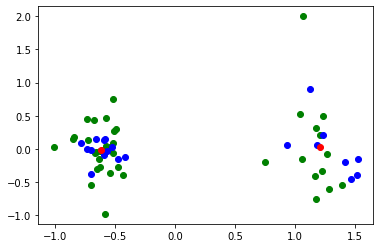

In [20]:
plt.plot( preprocessed_data[21:, 0], preprocessed_data[21:, 1], 'og', preprocessed_data[:21, 0] , preprocessed_data[:21, 1], "ob", pipe["clusterer"]["kmeans"].cluster_centers_[:, 0], pipe["clusterer"]["kmeans"].cluster_centers_[:, 1], 'or' )
plt.show() 

In [21]:
pipe["clusterer"]["kmeans"].cluster_centers_

array([[-0.62059794, -0.01232947],
       [ 1.21164359,  0.02407183]])